# Logistic Regression for multi-class problem

In [2]:
%matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,sys
sys.path.append(os.path.abspath('./')) #for import utility
from utility import plot_confusion_matrix,plot_decision_regions

In [5]:
import pandas as pd
print(pd.__version__)
import sklearn
print(sklearn.__version__)  #conda update scikit-learn

1.5.3
1.2.1


In [6]:
print(pd.__version__)
print(sklearn.__version__)

1.5.3
1.2.1


## 載入Iris資料集


In [7]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(iris['data'].size)
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data.head()

600
target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [15]:
iris=datasets.load_iris()
X=pd.DataFrame(iris["data"],columns=iris["feature_names"])
print(iris["data"].size)
print("target_names:"+str(iris["target_names"]))
y=pd.DataFrame(iris["target"],columns=["target"])
iris_data=pd.concat([x,y],axis=1)
iris_data=iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data.head()

600
target_names:['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data['target'], test_size=0.3, random_state=0)
#不篩選0,1，選擇多類別

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(iris_data[['sepal length (cm)','petal length (cm)']],iris_data["target"],test_size=0.3,random_state=0)

In [17]:
y_train.shape

(105,)

In [24]:
y_train.shape

(105,)

In [18]:
type(y_test)

pandas.core.series.Series

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(X_train)
sc=StandardScaler().fit(X_test)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)


In [21]:
iris_data


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',multi_class='auto') # multi_class=multinomial
lr.fit(X_train,y_train)
print('training accuracy:',lr.score(X_train, y_train))
print('test accuracy:',lr.score(X_test, y_test))

training accuracy: 0.9619047619047619
test accuracy: 0.9555555555555556


In [23]:
lr=LogisticRegression(solver="lbfgs",multi_class="auto")
lr.fit(X_train,y_train)
print('training accuracy:',lr.score(X_train,y_train))
print('test accuracy:',lr.score(X_test,y_test))

training accuracy: 0.9619047619047619
test accuracy: 0.9555555555555556


In [29]:
X_test[:2]

,sepal length (cm),petal length (cm)
114,5.8,5.1
62,6.0,4.0


In [25]:
X_test[:2]

,sepal length (cm),petal length (cm)
114,5.8,5.1
62,6.0,4.0


In [30]:
#prediction
pred=lr.predict(X_test)
print(pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [26]:
pred=lr.predict(X_test)
print(pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [31]:
#ground truth
print(y_test.values)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


In [29]:
print(y_test.values)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


In [32]:
len(y_test.values)

45

In [30]:
len(y_test.values)

45

In [32]:
error_index=np.where(pred!=y_test.values)[0]
error_index

array([24, 37])

In [34]:
error_index=np.where(pred!=y_test.values)[0]
error_index

array([24, 37])

In [89]:
pred[37]

2

In [87]:
y_test[:37]

114    2
62     1
33     0
107    2
7      0
100    2
40     0
86     1
76     1
71     1
134    2
51     1
73     1
54     1
63     1
37     0
78     1
90     1
45     0
16     0
121    2
66     1
24     0
8      0
126    2
22     0
44     0
97     1
93     1
26     0
137    2
84     1
27     0
127    2
132    2
59     1
18     0
Name: target, dtype: int64

In [60]:
y_test[66]

1

In [34]:
print(X_test.index[24],X_test.index[37])
#找出24與37筆資料的原始位置

126 83


In [38]:
print(X_test.index[24],X_test.index[37])

126 83


In [92]:
error_index=np.where(pred!=y_test.values)[0]
print('accuracy:',1-len(error_index)/len(X_test))
print('error_index:',error_index)
print('miss classification :',pred[error_index])#錯誤答案
data_index=X_test.iloc[error_index].index 
iris_data.iloc[data_index]#錯誤欄位的正確之原始資料


accuracy: 0.9555555555555556
error_index: [24 37]
miss classification : [1 2]


,sepal length (cm),petal length (cm),target
126,6.2,4.8,2
83,6.0,5.1,1


1

In [99]:
error_index=np.where(pred!=y_test.values)[0]
print('accuracy:',1-len(error_index)/len(X_test))
print('error_index:',error_index)
print('miss classification :',pred[error_index])
data_index=X_test.iloc[error_index].index
iris_data.iloc[data_index]

      
      

accuracy: 0.9555555555555556
error_index: [24 37]
miss classification : [1 2]


,sepal length (cm),petal length (cm),target
126,6.2,4.8,2
83,6.0,5.1,1


## decision_regions for test data

In [36]:
iris_data.iloc[data_index]

,sepal length (cm),petal length (cm),target
126,6.2,4.8,2
83,6.0,5.1,1


In [108]:
X_test.values

array([[5.8, 5.1],
       [6. , 4. ],
       [5.5, 1.4],
       [7.3, 6.3],
       [5. , 1.5],
       [6.3, 6. ],
       [5. , 1.3],
       [6.7, 4.7],
       [6.8, 4.8],
       [6.1, 4. ],
       [6.1, 5.6],
       [6.4, 4.5],
       [6.1, 4.7],
       [6.5, 4.6],
       [6.1, 4.7],
       [4.9, 1.4],
       [6. , 4.5],
       [5.5, 4.4],
       [4.8, 1.4],
       [5.4, 1.3],
       [5.6, 4.9],
       [5.6, 4.5],
       [4.8, 1.9],
       [4.4, 1.4],
       [6.2, 4.8],
       [4.6, 1. ],
       [5.1, 1.9],
       [6.2, 4.3],
       [5. , 3.3],
       [5. , 1.6],
       [6.4, 5.5],
       [5.4, 4.5],
       [5.2, 1.5],
       [6.1, 4.9],
       [6.4, 5.6],
       [5.2, 3.9],
       [5.7, 1.7],
       [6. , 5.1],
       [5.9, 4.2],
       [5.8, 4. ],
       [6.8, 5.5],
       [4.7, 1.3],
       [6.9, 5.1],
       [5. , 1.6],
       [5.4, 1.5]])

/Users/zhuzhiwen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/zhuzhiwen/Downloads/Unit05/utility.py:80: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


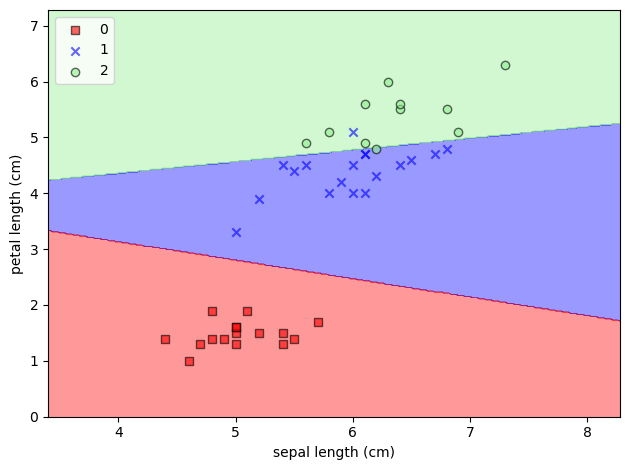

In [110]:
X_test_nd=X_test.values
plot_decision_regions(X_test_nd,y_test,classifier=lr)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


/Users/zhuzhiwen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/zhuzhiwen/Downloads/Unit05/utility.py:80: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


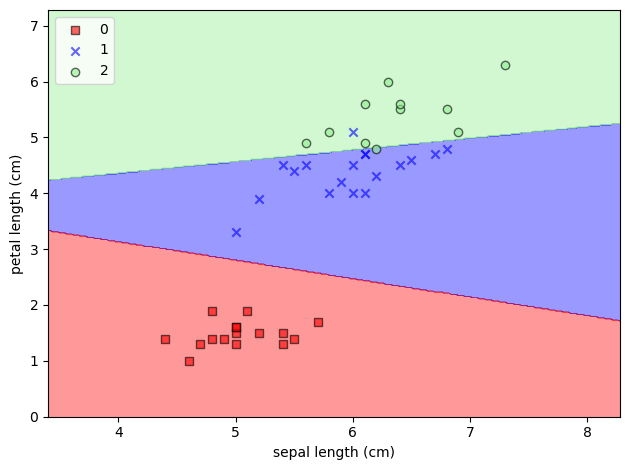

In [109]:
X_test_nd=X_test.values
plot_decision_regions(X_test_nd,y_test, classifier=lr)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


/Users/zhuzhiwen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/zhuzhiwen/Downloads/Unit05/utility.py:80: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


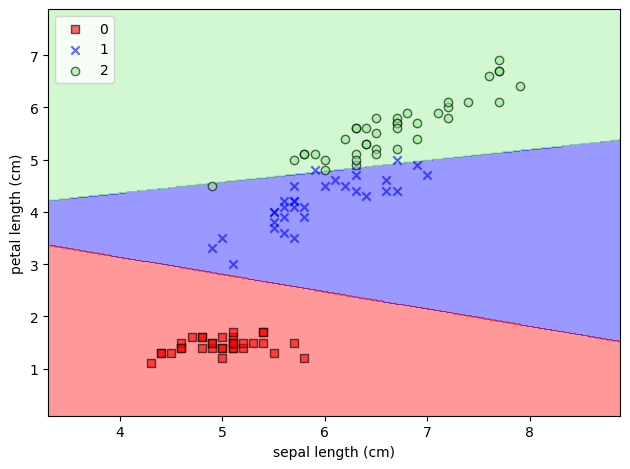

In [113]:
X_train_nd=X_train.values
plot_decision_regions(X_train_nd,y_train,classifier=lr)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## decision_regions for training data

/Users/zhuzhiwen/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/zhuzhiwen/Downloads/Unit05/utility.py:80: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


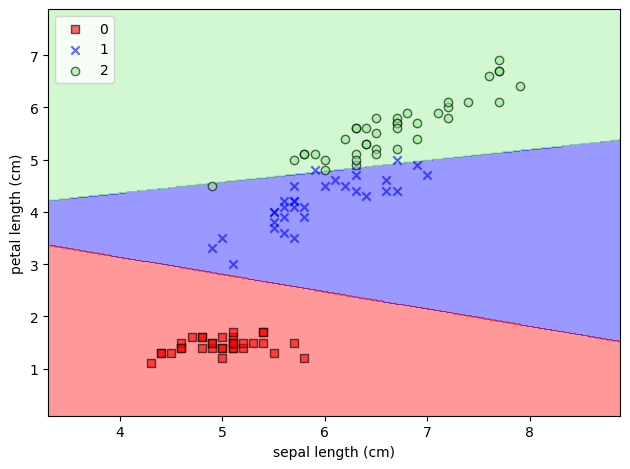

In [38]:
X_train_nd=X_train.values
plot_decision_regions(X_train_nd,y_train, classifier=lr)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [115]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [121]:
iris=datasets.load_iris()
features=iris.data
target=iris.target
print(iris.keys())
print(iris.feature_names)
print(iris.target_names)
target_names=iris.target_names
labels=target_names[target]

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [123]:
setosa_petal_length=features[labels=='setosa',2]
setosa_petal_width=features[labels=='setosa',3]
setosa=np.c_[setosa_petal_length,setosa_petal_width]
versicolor_petal_length=features[labels=='versicolor',2]
versicolor_petal_width=features[labels=='versicolor',3]
versicolor=np.c_[versicolor_petal_length,versicolor_petal_width]
virginica_petal_length=features[labels=='virginica',2]
virginica_petal_width=features[labels=='virginica',3]
virginica=np.c_[virginica_petal_length,virginica_petal_width]

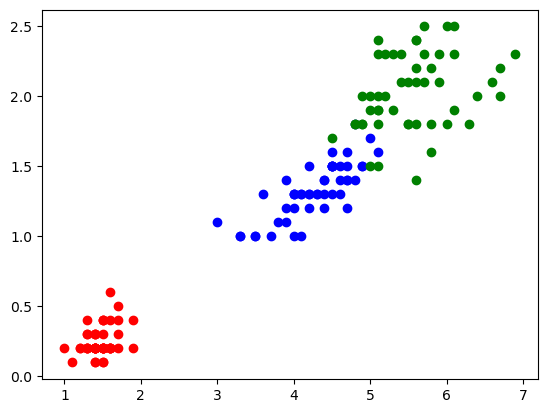

In [124]:
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')